- graficas tendencias separados de las concentraciones 
    solo dejar como titulo el parametro
- histograma tung vs cha; 
- histograma por lugar por estacion
- tablas excel de test

- QQ plots gurdar la fig grande
- corr plot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from scipy import stats
import statsmodels.api as sm

# FUnciones 

In [3]:
def simple_regplot(
    x, y, n_std=2, n_pts=100, ax=None, scatter_kws=None, line_kws=None, ci_kws=None
):
    """ Draw a regression line with error interval. """
    ax = plt.gca() if ax is None else ax

    # calculate best-fit line and interval
    x_fit = sm.add_constant(x)
    fit_results = sm.OLS(y, x_fit).fit()

    eval_x = sm.add_constant(np.linspace(np.min(x), np.max(x), n_pts))
    pred = fit_results.get_prediction(eval_x)

    # draw the fit line and error interval
    ci_kws = {} if ci_kws is None else ci_kws
    ax.fill_between(
        eval_x[:, 1],
        pred.predicted_mean - n_std * pred.se_mean,
        pred.predicted_mean + n_std * pred.se_mean,
        alpha=0.1,
        **ci_kws,
    )
    line_kws = {} if line_kws is None else line_kws
    h = ax.plot(eval_x[:, 1], pred.predicted_mean, **line_kws)

    # draw the scatterplot
    scatter_kws = {} if scatter_kws is None else scatter_kws
    ax.scatter(x, y, c=h[0].get_color(), **scatter_kws)

    return fit_results

# Lectura datos

In [4]:
data = pd.read_csv("Datos/df_filtrado.csv")
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%Y-%m-%d %H:%M:%S')
data = data.set_index("Fecha")
data = data.drop("Unnamed: 0",axis=1)
data["year"] = data.index.year
data["month"] = data.index.month
data

,est_codigo,Nombre_Estacion,Operador,valor,par_nombre,Unidad,laboratorio,ACH,Q,maximo,minimo,year,month
Fecha,,,,,,,,,,,,,
2020-10-15 12:20:00,TUN_C,Salida Humedal Tungurahua,=,0.640,Sulfatos,mg/L,GRÜNTEC,Alto Pita,NaN,NaN,NaN,2020,10
2020-10-15 12:20:00,TUN_C,Salida Humedal Tungurahua,=,1.800,Nitratos,mg/L,GRÜNTEC,Alto Pita,NaN,NaN,NaN,2020,10
2020-10-15 12:20:00,TUN_C,Salida Humedal Tungurahua,=,4.160,Nitrógeno Disuelto Disponible,mg/L,Universidad de Cuenca,Alto Pita,NaN,NaN,NaN,2020,10
2020-10-15 12:20:00,TUN_C,Salida Humedal Tungurahua,=,7.250,Oxígeno Disuelto,mg/L,FONAG,Alto Pita,NaN,NaN,NaN,2020,10
2020-10-15 12:20:00,TUN_C,Salida Humedal Tungurahua,=,7.746,Potencial de Hidrógeno,pH,FONAG,Alto Pita,NaN,NaN,NaN,2020,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-28 10:10:00,CHA_P,Chamilco Alto Pita,=,8.032,Potencial de Hidrógeno,pH,FONAG,Alto Pita,9.693807,85.790188,85.790188,2023,11
2023-11-28 10:10:00,CHA_P,Chamilco Alto Pita,=,9.700,Temperatura del Agua,°C,FONAG,Alto Pita,9.693807,85.790188,85.790188,2023,11
2023-11-28 10:10:00,CHA_P,Chamilco Alto Pita,=,40.000,Color Aparente,U-Co,EPMAPS,Alto Pita,9.693807,85.790188,85.790188,2023,11


In [ ]:
gropued = data.groupby("year")
for y,val in gropued:
    print(y, "count=",val.count().values[0])

In [ ]:
gropued = data.groupby("est_codigo")
for y,val in gropued:
    print(y, "count=",val.count().values[0])

In [ ]:
gropued = data.groupby("est_codigo")
for station,val in gropued:
    est_group = val.groupby("year")
    print(station)
    for y,vals in est_group:
        print(y, "count=",vals.count().values[0])
        pars = vals.groupby("par_nombre")
        for par,par_val in pars:
            print(par, par_val.count().values[0])


In [ ]:
gropued = data.groupby("est_codigo")
for station,val in gropued:
    print(station)
    pars = val.groupby("par_nombre")
    for par,par_val in pars:
        print(par, par_val.count().values[0])


# Histogramas Q

In [ ]:
data = pd.read_csv("Datos/df_filtrado.csv")
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%Y-%m-%d %H:%M:%S')
data = data.set_index("Fecha")
data = data.drop("Unnamed: 0",axis=1)

In [ ]:
for col in ["Q","maximo", "minimo"]:
    est = data[[col]].dropna()
    est["year"] = est.index.year
    plt.figure(figsize=(6,3))
    sns.histplot(data=est, x=col,hue="year", element="poly",multiple="stack")
    plt.title(col)
    plt.show()    

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 2))
for i, col in enumerate(["Q", "maximo"]):
    est = data[[col]].dropna()
    ax = axs[i]
    shape, loc, scale = stats.gamma.fit(est[col])
    res = stats.probplot(np.ravel(est[col].values), dist="gamma", sparams=(shape,loc,scale),plot=ax)
    ax.set_title("GAMMA "+col)    
    print(shape,loc)
    alpha, loc, scale = stats.gamma.fit(est[col].values)
    print("gamma mean=",alpha*scale)
plt.show()    

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 2))
for i, col in enumerate(["Q", "maximo"]):
    est = data[[col]].dropna()
    ax = axs[i]
    exp_var,exp_mean = stats.expon.fit(est[col])
    res = stats.probplot(np.ravel(est[col].values), dist=stats.expon, sparams=(exp_var,exp_mean),plot=ax)
    ax.set_title("EXP "+ col)
    print(col,"exp mean=",exp_mean)
    #stats.expon.mean(shape)
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 2))
for i, col in enumerate(["Q", "maximo"]):
    est = data[[col]].dropna()
    ax = axs[i]
    params_dg = stats.dgamma.fit(est[col])
    res = stats.probplot(np.ravel(est[col].values), dist=stats.dgamma, sparams=(params_dg),plot=ax)
    ax.set_title("dgamma " + col)
plt.show()
    #print("exp mean=",exp_mean)
    #stats.expon.mean(shape)

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 2))
for i, col in enumerate(["Q", "maximo"]):
    est = data[[col]].dropna()
    ax = axs[i]
    mu, sigma = stats.norm.fit(est[col].values)
    print(col,"mu",mu, "sigma",sigma)
    res = stats.probplot(np.ravel(est[col].values), dist=stats.norm, sparams=(mu,sigma),plot=ax)
    ax.set_title("NORMAL " + col)
plt.show()

In [ ]:
# for col in ["Q","maximo", "minimo"]:
#     est = data.dropna()
#     est["year"] = est.index.year.astype(str)
#     plt.figure(figsize=(6,3))
#     sns.relplot(
#         data=est, x="year", y=col,
#         col="est_codigo", hue="laboratorio", #style="day",
#         kind="scatter"
#     )

#     plt.show()    

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

for i, col in enumerate(["Q", "maximo"]):
    gropued = data.groupby("est_codigo")
    j = 0
    for y, val in gropued:
        ax = axs[i, j]
        est = val[[col]].dropna()
        est["year"] = est.index.year.astype(int)
        sns.regplot(data=est, x="year", y=col, x_jitter=.2, label="Regression Line", scatter_kws={'s': 50, 'alpha': 0.5}, ax=ax)
        ax.set_title(y)
        ax.legend()
        j+= 1

plt.tight_layout()
plt.show()

- A small p-value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance
- When there is no relationship between the response (coefficients) and predictors, one would expect the F -statistic to take on a value close to 1.


In [ ]:
for col in ["Q","maximo", "minimo"]:
    gropued = data.groupby("est_codigo")
    for y,val in gropued:
        fig = plt.figure(figsize=(4,2))
        ax = fig.add_subplot()
    
        est = val[[col]].dropna()
        est["year"] = est.index.year.astype(int)
        fit_results = simple_regplot(x=est["year"].values, y=est[col].values, ax=ax)#ci=None)
        print(fit_results.summary())
        plt.ylabel(col)
        plt.title(y)
        plt.show()

# Q por ACH

In [ ]:
gropued = data.groupby("est_codigo")
for y,val in gropued:
    print(y, "count=",val.count().values[0])
    for col in ["Q","maximo", "minimo"]:
        est = val[[col]].dropna()
        est["year"] = est.index.year
        plt.figure(figsize=(6,3))
        sns.histplot(data=est, x=col,hue="year", element="poly",multiple="stack")
        plt.title(col)
        plt.show()    

In [ ]:
gropued = data.groupby("est_codigo")
for station,val in gropued:
    print(station)
    print(len(val["par_nombre"].unique()))
    

# por ACH

In [ ]:
# base
pars = data.groupby("par_nombre")

for par,par_val in pars:
    #plt.figure(figsize=(3,3))
    muestras_tun = str(par_val.loc[par_val["est_codigo"] == "TUN_C"].count().values[0])
    muestras_cha = str(par_val.loc[par_val["est_codigo"] == "CHA_P"].count().values[0])
    plt.title(par+'\n'+r'n$_{Cha}$='+muestras_cha+'\n'+r'n$_{Tun}$='+muestras_tun )
    sns.histplot(data=par_val, x="valor" ,hue="est_codigo", element="poly",multiple="stack")
    plt.savefig('Resultados/Alto Pita/Plots EDA/'+par+' - histograma.png',dpi=1440,bbox_inches="tight")
    plt.tight_layout()
    plt.show()


In [ ]:
val = data.sort_values(by="par_nombre")
val["year"] = val.index.year
pars = val.groupby("par_nombre")

# Create a 5x4 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Iterate over each par and plot the histogram
for i, (par, par_val) in enumerate(pars):
    par_val = par_val[["valor","est_codigo"]].dropna()
    muestras_tun = str(par_val.loc[par_val["est_codigo"] == "TUN_C"].count().values[0])
    muestras_cha = str(par_val.loc[par_val["est_codigo"] == "CHA_P"].count().values[0])
    row, col = divmod(i, 4)
    ax = axes[row, col]
    ax.set_title(par+'\n'+r'n$_{Cha}$='+muestras_cha+'\n'+r'n$_{Tun}$='+muestras_tun )
    sns.histplot(data=par_val, x="valor", hue="est_codigo", element="poly", multiple="stack", ax=ax)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
val = data.sort_values(by="par_nombre")
val["year"] = val.index.year
pars = val.groupby("par_nombre")

# Create a 5x4 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
fig.suptitle(station+'\n\n')

# Iterate over each par and plot the histogram
for i, (par, par_val) in enumerate(pars):
    par_val_log = par_val[["valor","est_codigo"]].dropna()
    par_val_log["valor"] = np.log(par_val_log["valor"])
    muestras_tun = str(par_val.loc[par_val["est_codigo"] == "TUN_C"].count().values[0])
    muestras_cha = str(par_val.loc[par_val["est_codigo"] == "CHA_P"].count().values[0])
    row, col = divmod(i, 4)
    ax = axes[row, col]
    ax.set_title('Log '+par+'\n'+r'n$_{Cha}$='+muestras_cha+'\n'+r'n$_{Tun}$='+muestras_tun )
    sns.histplot(data=par_val_log, x="valor", hue="est_codigo", element="poly", multiple="stack", ax=ax)

# Adjust layout
plt.tight_layout()
plt.show()

# Histogramas y Distribucion por variable por ACH

In [ ]:
# base
gropued = data.groupby("est_codigo")
for station,val in gropued:
    val["year"] = val.index.year
    pars = val.groupby("par_nombre")
    for par,par_val in pars:
        plt.title(station+" - "+par)
        sns.histplot(data=par_val, x="valor" ,hue="year", element="poly",multiple="stack")
        plt.tight_layout()
        plt.savefig('Resultados/Alto Pita/Plots EDA/'+station+'_'+par+' - histograma.png',dpi=1440,bbox_inches="tight")
        plt.show()

In [ ]:
gropued = data.groupby("est_codigo")
for station,val in gropued:    
    val = val.sort_values(by="par_nombre")
    val["year"] = val.index.year
    pars = val.groupby("par_nombre")

    # Create a 5x4 grid of subplots
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
    fig.suptitle(station+'\n\n')

    # Iterate over each par and plot the histogram
    for i, (par, par_val) in enumerate(pars):
        par_val = par_val[["valor","year"]].dropna()
        muestras = str(par_val.count().values[0])
        row, col = divmod(i, 4)
        ax = axes[row, col]
        ax.set_title(par+'\nn='+muestras)
        sns.histplot(data=par_val, x="valor", hue="year", element="poly", multiple="stack", ax=ax)

    # Adjust layout
    plt.tight_layout()

In [ ]:
gropued = data.groupby("est_codigo")
for station,val in gropued:    
    normal_par = []
    p_val = []

    val = val.sort_values(by="par_nombre")
    val["year"] = val.index.year
    pars = val.groupby("par_nombre")

    # Create a 5x4 grid of subplots
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
    fig.suptitle(station)

    # Iterate over each par and plot the histogram
    for i, (par, par_val) in enumerate(pars):
        row, col = divmod(i, 4)
        ax = axes[row, col]
        
        # data to fit
        est = par_val[["valor"]].dropna()
        muestras = str(est.count().values[0])
        
        # Perform the Shapiro-Wilk test
        # The statistic tends to be high (close to 1) for samples drawn from a normal distribution.
        # Null hypothesis that the data was drawn from a normal distribution
        # small p-value => data is not drawn from a normal distribution
        test = stats.shapiro(est)

        # Fit a normal distribution to the data
        mu, sigma = stats.norm.fit(est["valor"].values)
        res = stats.probplot(np.ravel(est["valor"].values), dist=stats.norm, sparams=(mu,sigma),plot=ax)   

        
        if test[1] > 0.05:
            ax.set_title(par+'\nDist: Normal; n='+muestras+'\nShapiro-Wilk: statistic='+str(np.round(test[0],2))+'; p-value='+str(np.round(test[1],4)))
            normal_par.append(par)
            p_val.append(np.round(test[1],4))    
        else:
            ax.set_title(par+'\nDist: Unknown; n='+muestras+'\nShapiro-Wilk: statistic='+str(np.round(test[0],2))+'; p-value='+str(np.round(test[1],4)))
        
        
    # Adjust layout
    #plt.savefig('Resultados/Alto Pita/Plots EDA/'+station+' - QQplots y ShapiroWilk test.png',dpi=1440)#,bbox_inches="tight")
    plt.tight_layout()
    plt.show()

    xxx=input("pause")
    
    for n,p in zip(normal_par, p_val):
        print(station,",",n,",",p)

In [ ]:
statistics = []
p_vals = []
tam_muestra = []
par_name= []
lugar = []
gropued = data.groupby("est_codigo")
for station,val in gropued:    
    normal_par = []
    p_val = []

    val = val.sort_values(by="par_nombre")
    val["year"] = val.index.year
    pars = val.groupby("par_nombre")


    # Iterate over each par and plot the histogram
    for i, (par, par_val) in enumerate(pars):

        # data to fit
        est = par_val[["valor"]].dropna()
                
        # Perform the Shapiro-Wilk test
        # The statistic tends to be high (close to 1) for samples drawn from a normal distribution.
        # Null hypothesis that the data was drawn from a normal distribution
        # small p-value => data is not drawn from a normal distribution
        test = stats.shapiro(est)
        statistics.append( np.round(test[0],2))
        p_vals.append( np.round(test[1],4))
        tam_muestra.append(est.count().values[0])
        par_name.append(par)
        lugar.append(station)

for l,pn,s,pv,n in zip(lugar,par_name,statistics,p_vals,tam_muestra):
    print(l,",",pn,",",s,",",pv,",",n)

In [ ]:
gropued = data.groupby("est_codigo")
for station,val in gropued:    
    val = val.sort_values(by="par_nombre")
    val["year"] = val.index.year
    pars = val.groupby("par_nombre")

    # Create a 5x4 grid of subplots
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
    fig.suptitle(station+'\n\n')

    # Iterate over each par and plot the histogram
    for i, (par, par_val) in enumerate(pars):
        par_val_log = par_val[["valor","year"]].dropna()
        par_val_log["valor"] = np.log(par_val_log["valor"])
        muestras = str(par_val_log.count().values[0])
        row, col = divmod(i, 4)
        ax = axes[row, col]
        ax.set_title("Log "+par+'\nn='+muestras)
        sns.histplot(data=par_val_log, x="valor", hue="year", element="poly", multiple="stack", ax=ax)

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
gropued = data.groupby("est_codigo")
for station,val in gropued:    
    normal_par = []
    p_val = []
    
    val = val.sort_values(by="par_nombre")
    val["year"] = val.index.year
    pars = val.groupby("par_nombre")

    # Create a 5x4 grid of subplots
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
    fig.suptitle(station+'\n\n')

    # Iterate over each par and plot the histogram
    for i, (par, par_val) in enumerate(pars):
        row, col = divmod(i, 4)
        ax = axes[row, col]
        
        # data to fit
        est = par_val[["valor"]].dropna()
        est["valor"] = np.log(est["valor"])
        muestras = str(est.count().values[0])
        
        # Perform the Shapiro-Wilk test
        # The statistic tends to be high (close to 1) for samples drawn from a normal distribution.
        # Null hypothesis that the data was drawn from a normal distribution
        # small p-value => data is not drawn from a normal distribution
        test = stats.shapiro(est)

        # Fit a normal distribution to the data
        mu, sigma = stats.norm.fit(est["valor"].values)
        res = stats.probplot(np.ravel(est["valor"].values), dist=stats.norm, sparams=(mu,sigma),plot=ax)   

        ax.set_title('Log '+par+' NORMAL\nn='+muestras+'\nstatistic='+str(np.round(test[0],2))+'  p-value='+str(np.round(test[1],4)))

        if test[1] > 0.05:
            normal_par.append(par)
            p_val.append(np.round(test[1],4))
    # Adjust layout
    plt.tight_layout()
    
    plt.show()

    for n,p in zip(normal_par, p_val):
        print("Log",station,",",n,",",p)

tendencias

In [ ]:
# # base
# gropued = data.groupby("est_codigo")
# for station,val in gropued:    
#     val = val.sort_values(by="par_nombre")
#     val["year"] = val.index.year.astype(int)
#     pars = val.groupby("par_nombre")

#     # Iterate over each par and plot the histogram
#     for par, par_val in pars:
#         est = par_val[["valor","year"]].dropna()
#         est["valor"] = np.log(est["valor"])
#         sns.regplot(data=est, x="year", y="valor", x_jitter=.2, label="Regression Line", scatter_kws={'s': 50, 'alpha': 0.5})#, ax=ax)
#         plt.title(station+" Log"+par)
#         plt.show()

In [ ]:
gropued = data.groupby("est_codigo")
for station,val in gropued:    
    normal_par = []
    p_val = []
    
    val = val.sort_values(by="par_nombre")
    val["year"] = val.index.year
    pars = val.groupby("par_nombre")

    # Create a 5x4 grid of subplots
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
    fig.suptitle(station+'\n\n')

    # Iterate over each par and plot the histogram
    for i, (par, par_val) in enumerate(pars):
        row, col = divmod(i, 4)
        ax = axes[row, col]
        
        # data to fit
        est = par_val[["valor","year"]].dropna()
        est["valor"] = np.log(est["valor"])
        muestras = str(est["valor"].count())
        # Perform the Shapiro-Wilk test
        # The statistic tends to be high (close to 1) for samples drawn from a normal distribution.
        # Null hypothesis that the data was drawn from a normal distribution
        # small p-value => data is not drawn from a normal distribution
        test = stats.shapiro(est["valor"].values)
        sns.regplot(data=est, x="year", y="valor", x_jitter=.2, label="Regression Line", scatter_kws={'s': 50, 'alpha': 0.5}, ax=ax)
        #ax.set_xticks([str(x) for x in range(min(est["year"]),max(est["year"])+1)])
        

        if test[1] > 0.05:
            ax.set_title('Log '+par+'\nDist: Normal; n='+muestras+'\nstatistic='+str(np.round(test[0],2))+'; p-value='+str(np.round(test[1],4)))
        else:
            ax.set_title('Log '+par+'\nDist: Unknown; n='+muestras+'\nstatistic='+str(np.round(test[0],2))+'; p-value='+str(np.round(test[1],4)))
        

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
gropued = data.groupby("est_codigo")
for station,val in gropued:    
    normal_par = []
    p_val = []
    
    val = val.sort_values(by="par_nombre")
    val["year"] = val.index.year
    pars = val.groupby("par_nombre")

    # Create a 5x4 grid of subplots
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
    fig.suptitle(station+'\n\n')

    # Iterate over each par and plot the histogram
    for i, (par, par_val) in enumerate(pars):
        row, col = divmod(i, 4)
        ax = axes[row, col]
        
        # data to fit
        est = par_val[["valor","year"]].dropna()
        #est["valor"] = np.log(est["valor"])
        muestras = str(est["valor"].count())
        # Perform the Shapiro-Wilk test
        # The statistic tends to be high (close to 1) for samples drawn from a normal distribution.
        # Null hypothesis that the data was drawn from a normal distribution
        # small p-value => data is not drawn from a normal distribution
        test = stats.shapiro(est["valor"].values)
        sns.regplot(data=est, x="year", y="valor", x_jitter=.2, label="Regression Line", scatter_kws={'s': 50, 'alpha': 0.5}, ax=ax)
        #ax.set_xticks([str(x) for x in range(min(est["year"]),max(est["year"])+1)])
        

        if test[1] > 0.05:
            ax.set_title(par+'\nDist: Normal; n='+muestras+'\nstatistic='+str(np.round(test[0],2))+'; p-value='+str(np.round(test[1],4)))
        else:
            ax.set_title(par+'\nDist: Unknown; n='+muestras+'\nstatistic='+str(np.round(test[0],2))+'; p-value='+str(np.round(test[1],4)))
        

    # Adjust layout
    plt.tight_layout()
    plt.show()

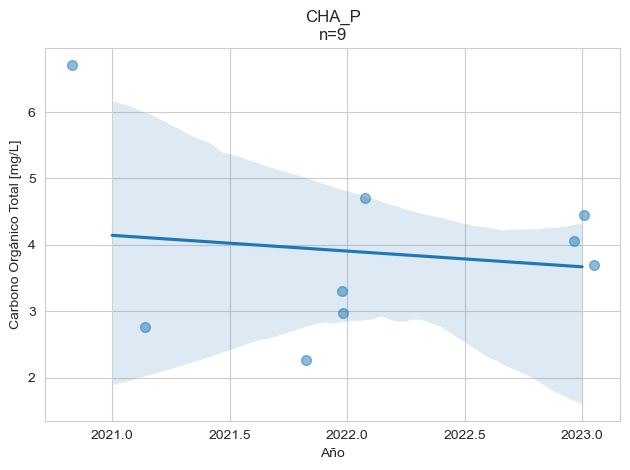

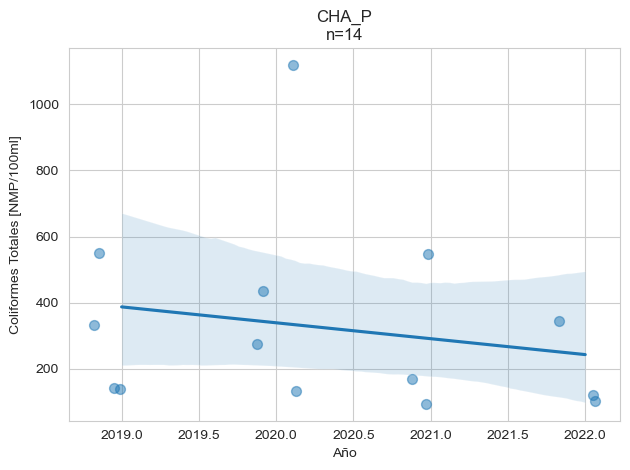

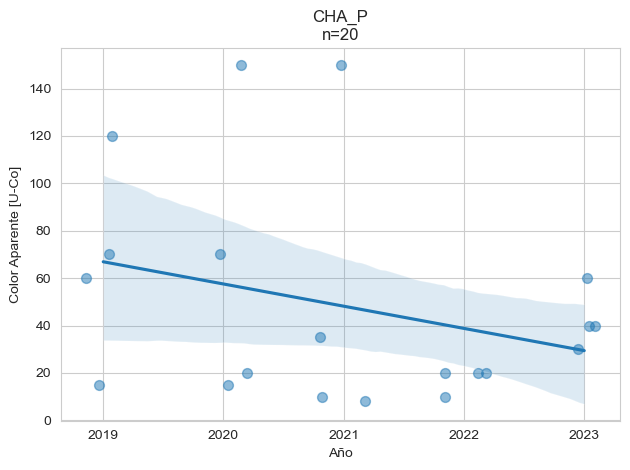

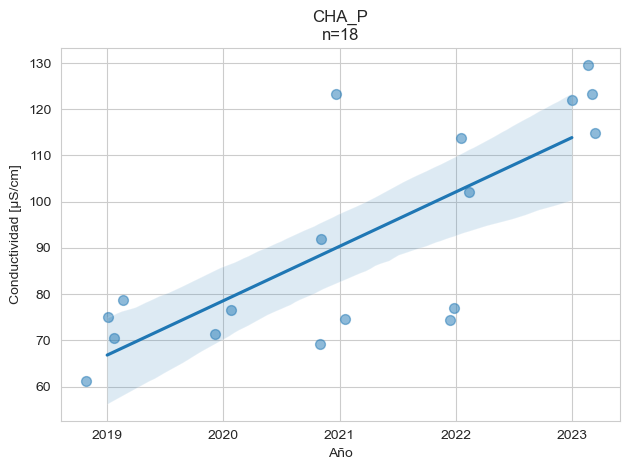

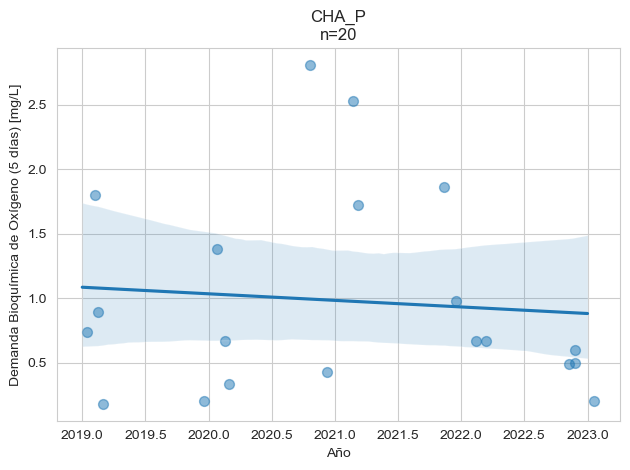

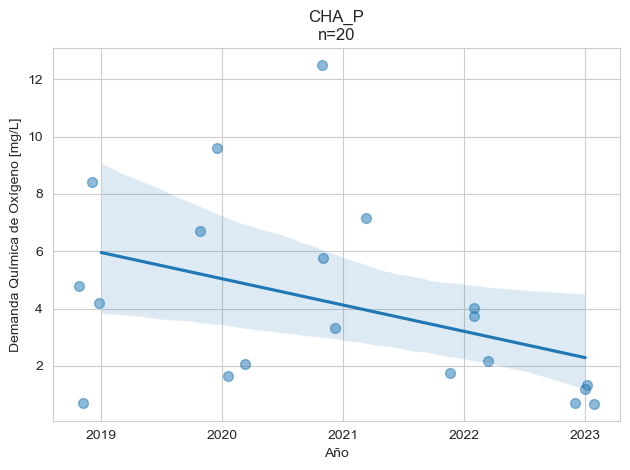

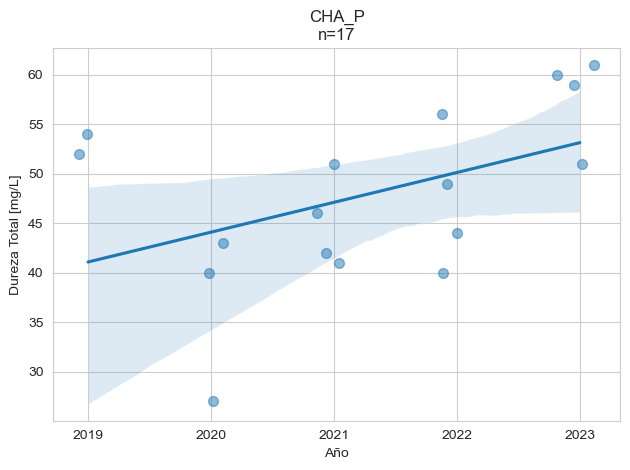

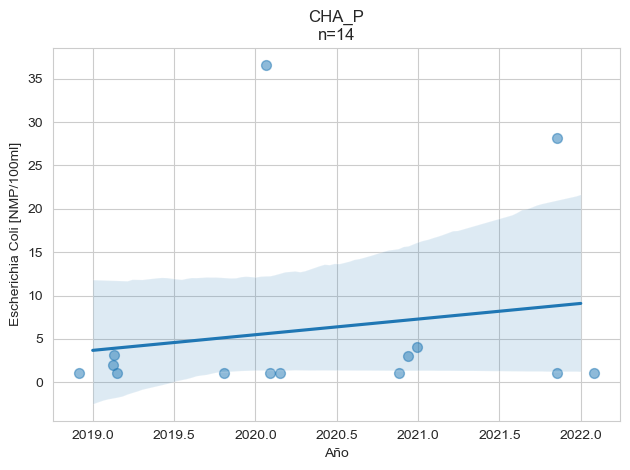

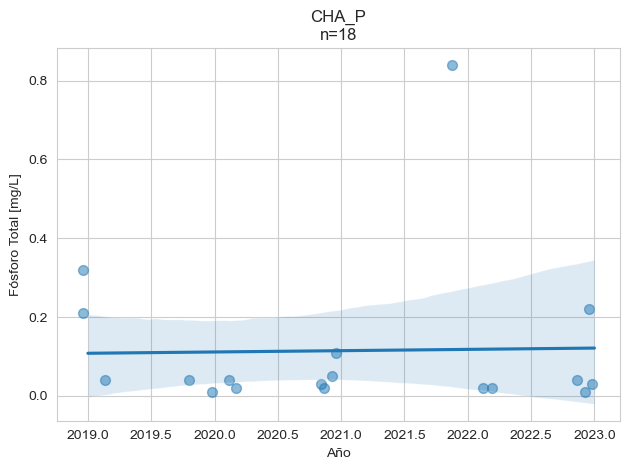

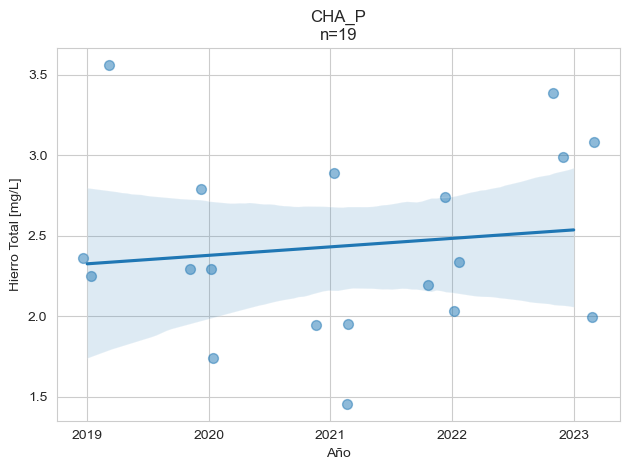

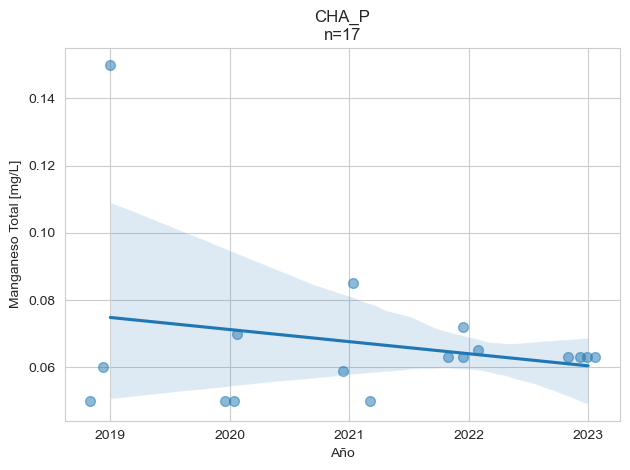

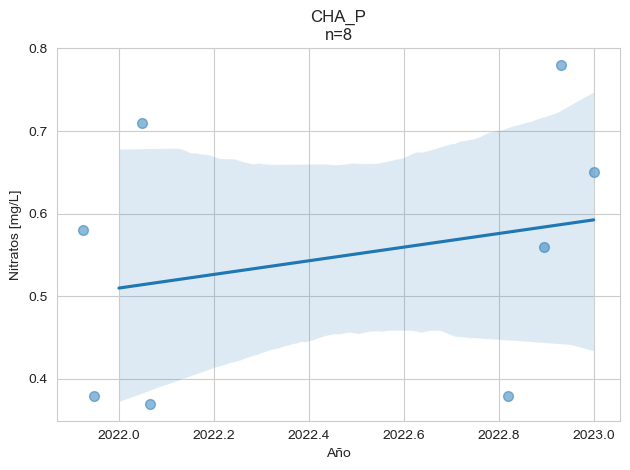

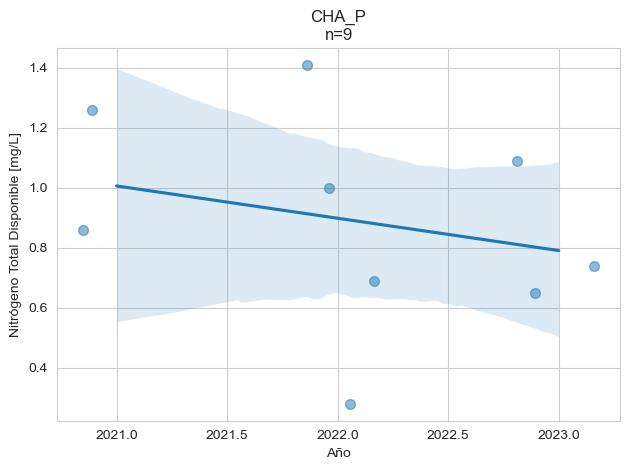

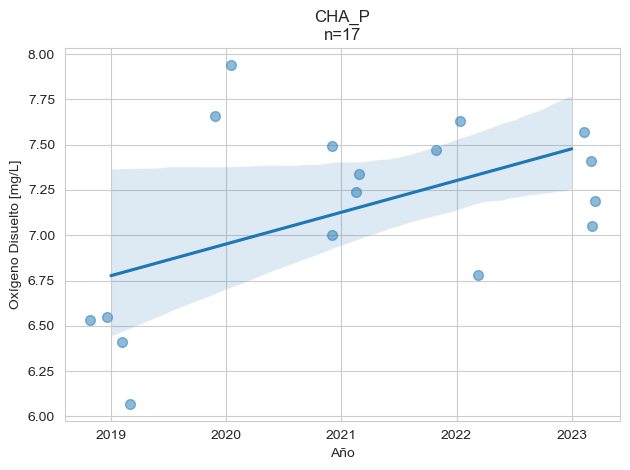

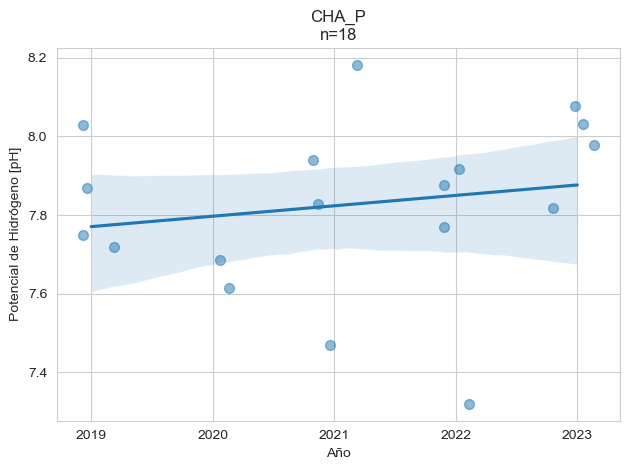

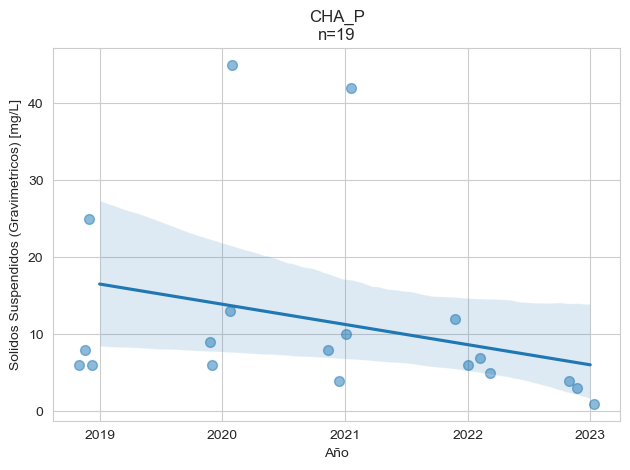

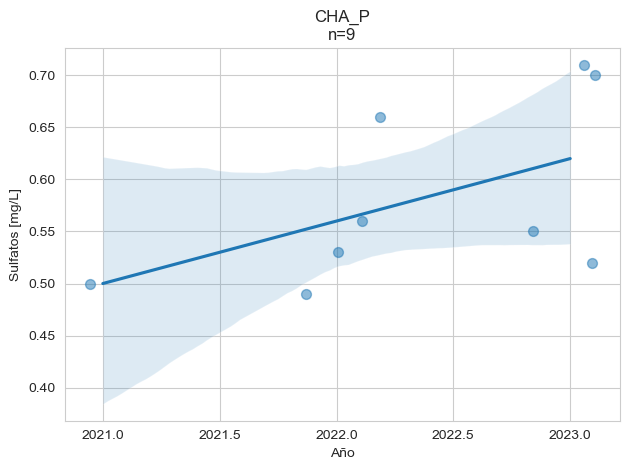

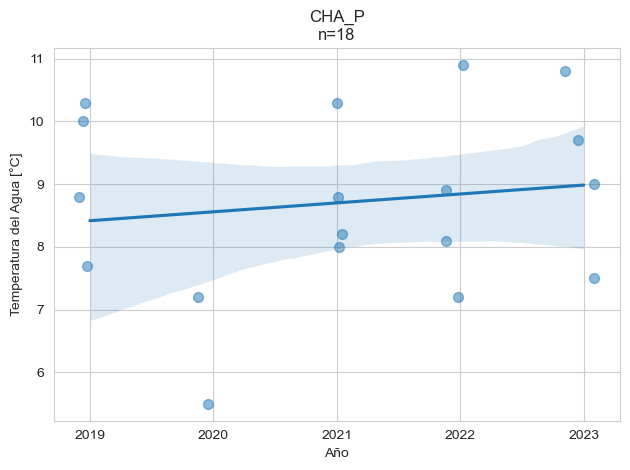

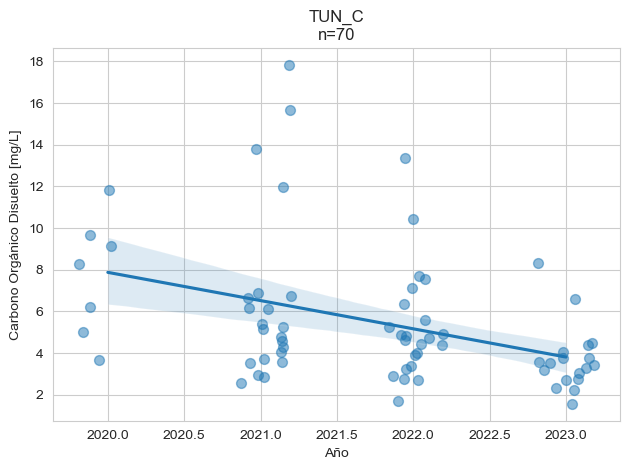

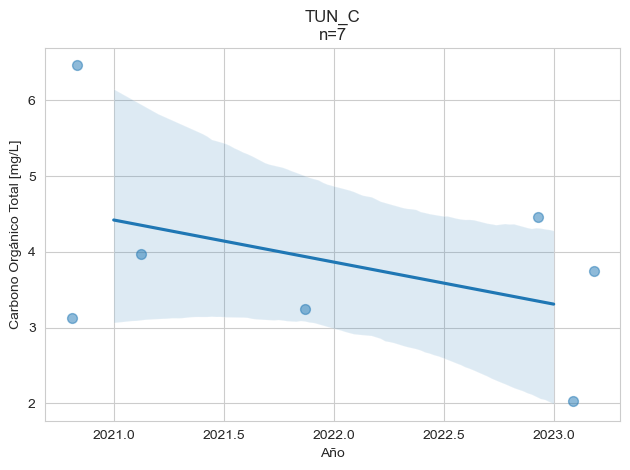

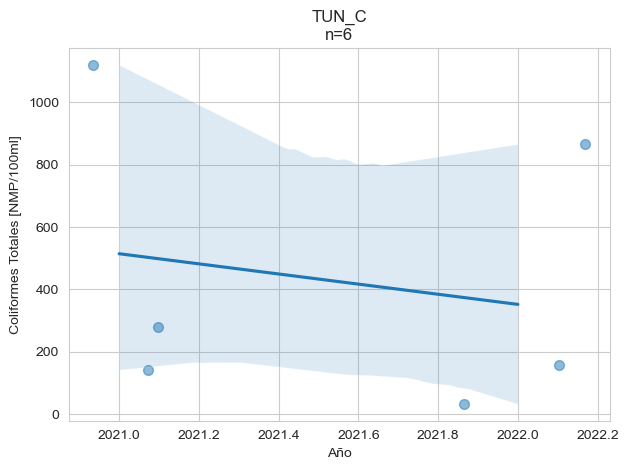

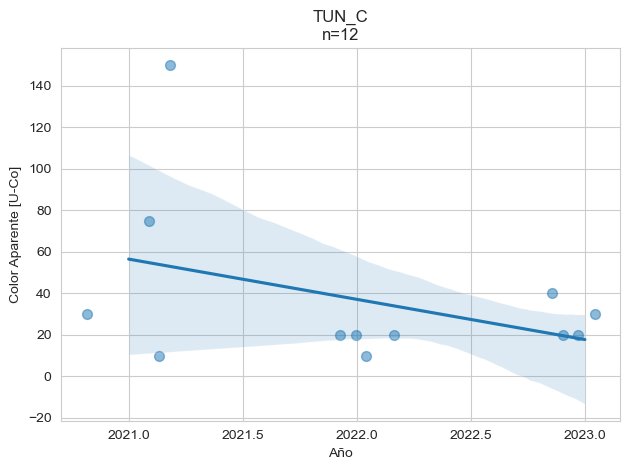

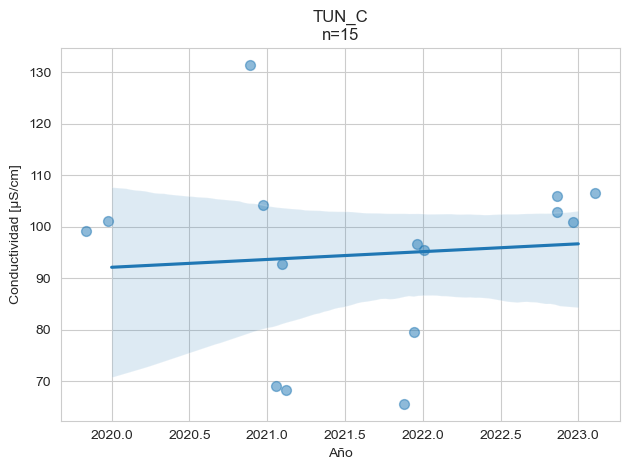

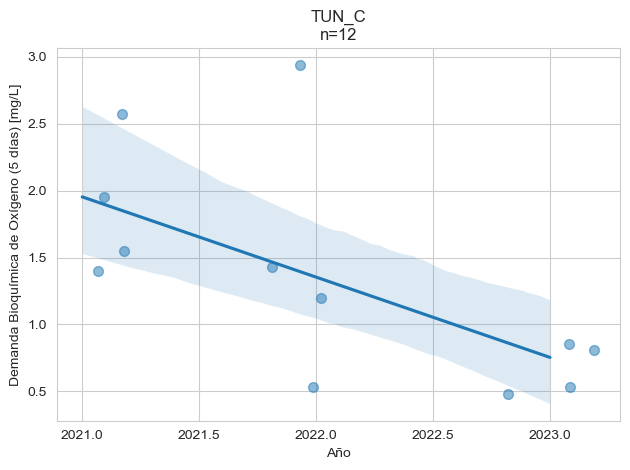

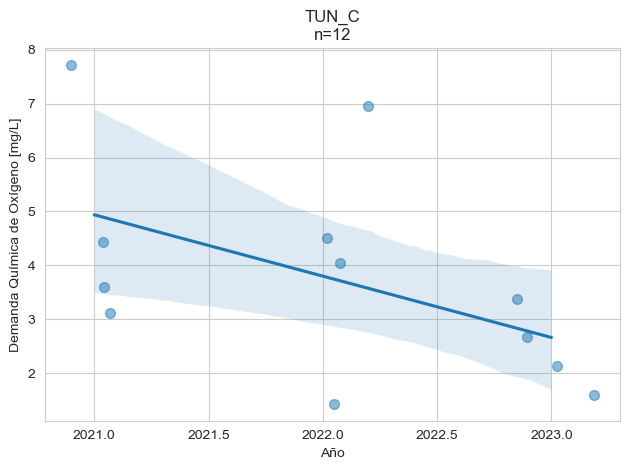

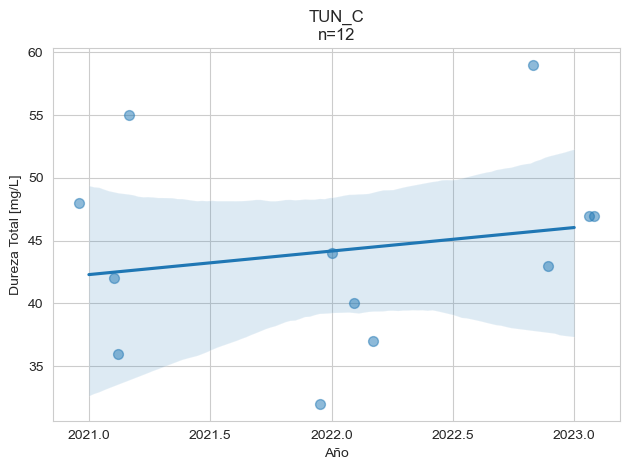

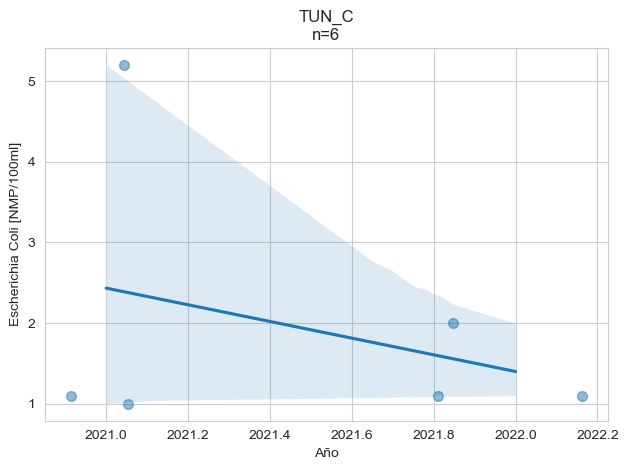

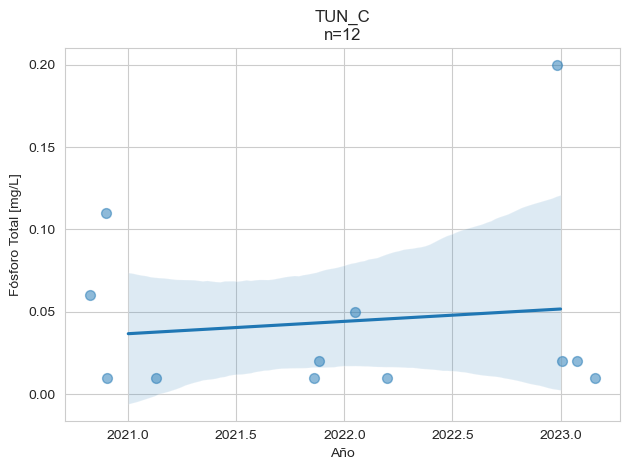

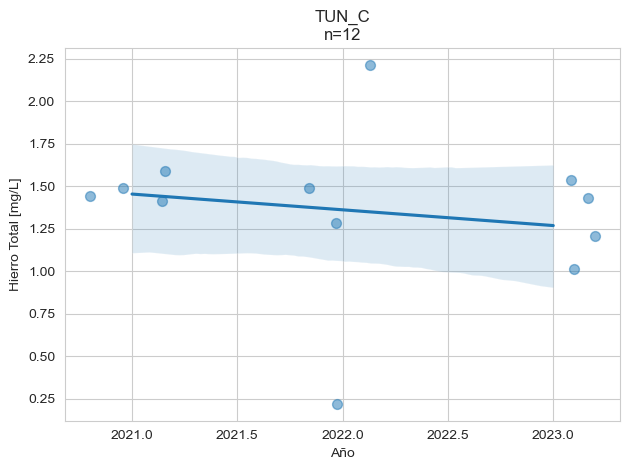

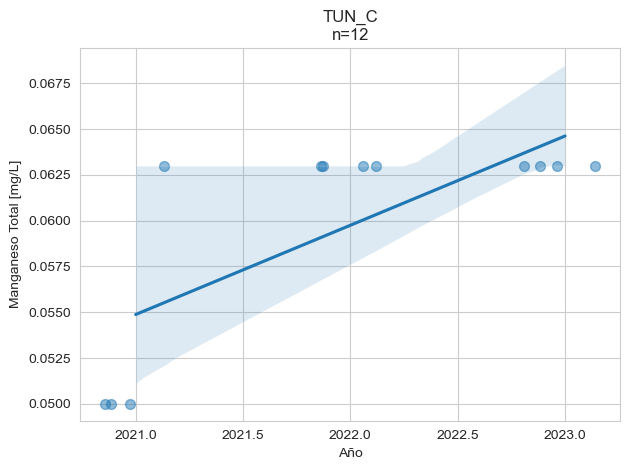

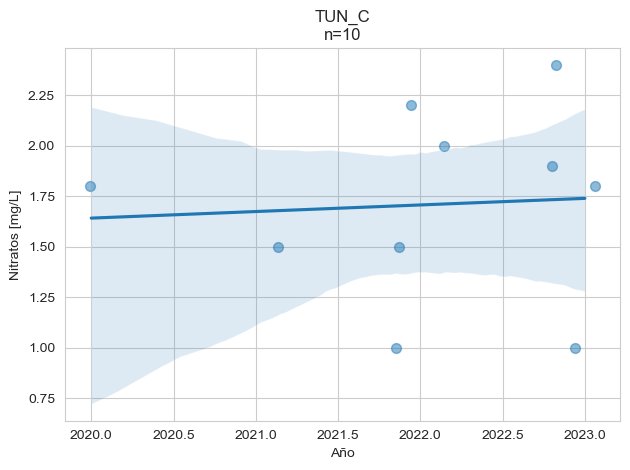

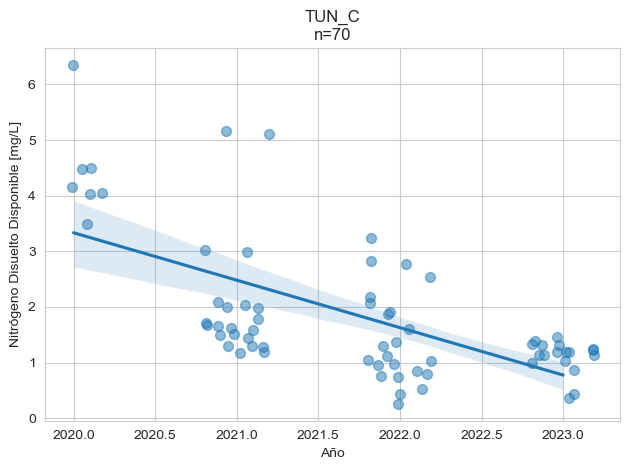

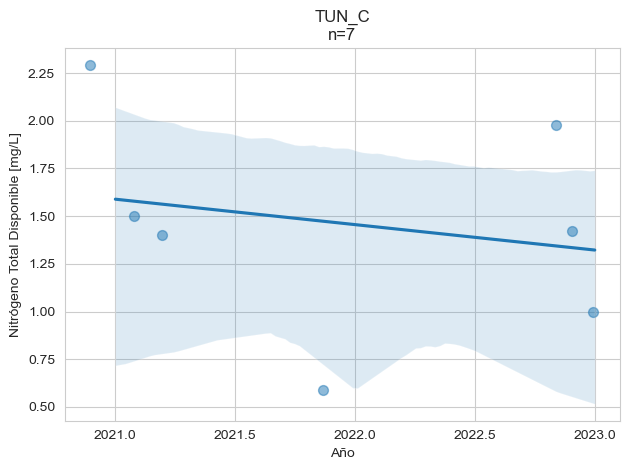

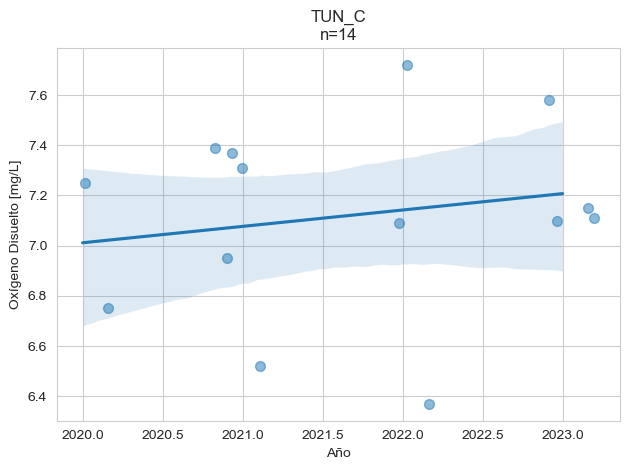

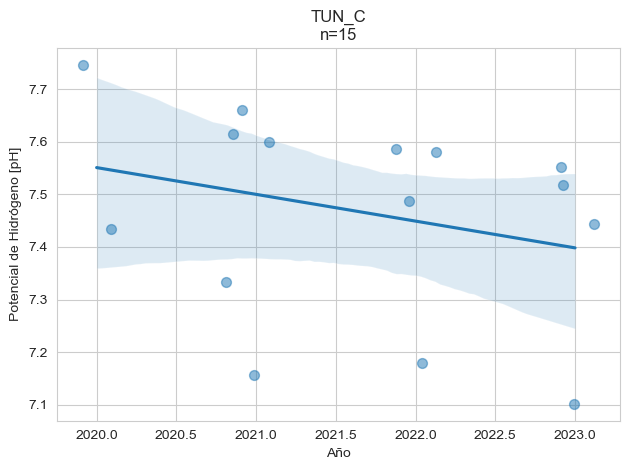

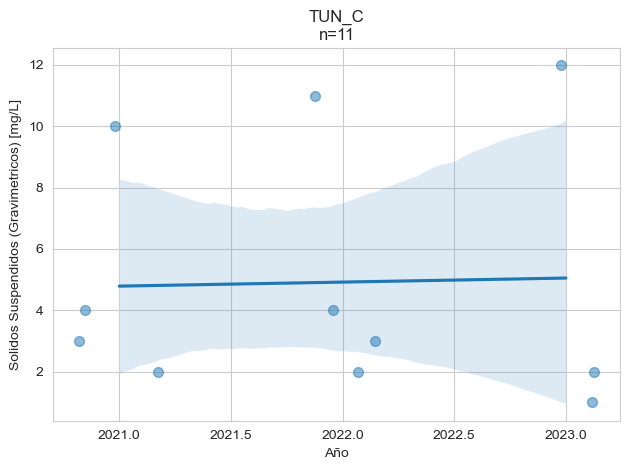

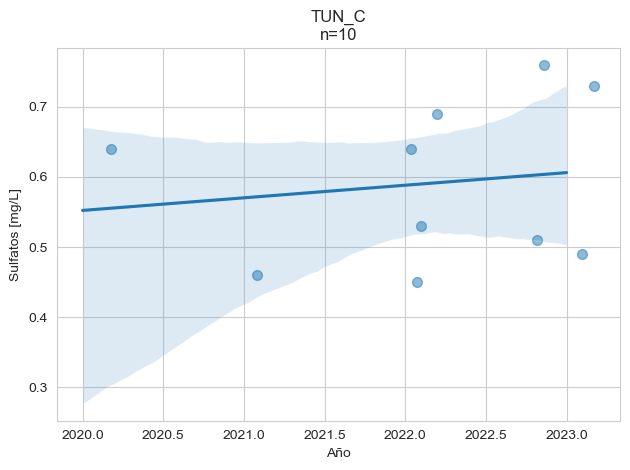

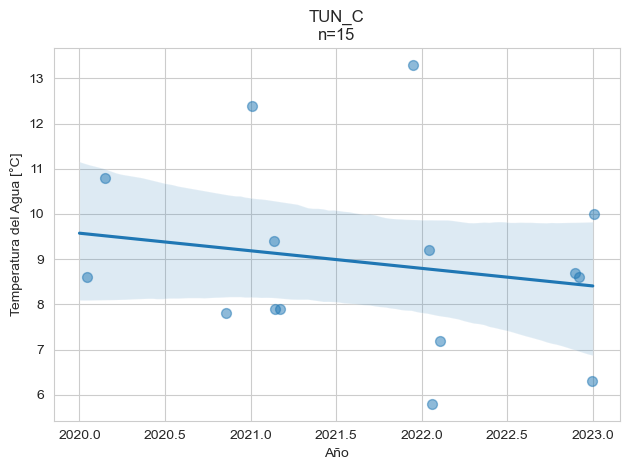

In [15]:
# base
gropued = data.groupby("est_codigo")
for station,val in gropued:    
    val = val.sort_values(by="par_nombre")
    val["year"] = val.index.year.astype(int)
    pars = val.groupby("par_nombre")

    # Iterate over each par and plot the histogram
    for par, par_val in pars:
        #plt.figure(figsize=(2,3))
        est = par_val[["valor","year","Unidad"]].dropna()
        unidad = est["Unidad"].iloc[0]
        muestras = str(est["valor"].count())
        sns.regplot(data=est, x="year", y="valor", x_jitter=.2, label="Regression Line", scatter_kws={'s': 50, 'alpha': 0.5})#, ax=ax)
        plt.title(station+'\nn='+muestras)
        plt.xlabel('Año')
        plt.ylabel(par+' ['+unidad+']')        
        plt.savefig('Resultados/Alto Pita/Plots EDA/'+station+'_'+par+' - tendencias.png',dpi=1440,bbox_inches="tight")

        plt.tight_layout()
        plt.show()

test regresion

In [40]:
gropued = data.groupby("est_codigo")
for station,val in gropued:    
    estadistico = []
    p_value = []
    par_name = []
    val = val.sort_values(by="par_nombre")
    val["year"] = val.index.year.astype(int)
    pars = val.groupby("par_nombre")
    for par, par_val in pars:
        est = par_val[["valor","year"]].dropna()
        fit_results = simple_regplot(x=est["year"].values, y=est["valor"].values, ax=ax)#ci=None)
        #print(par,",",fit_results._results.tvalues[1],",",fit_results._results.pvalues[1])
        estadistico.append(fit_results._results.tvalues[1])
        p_value.append(fit_results._results.pvalues[1])
        par_name.append(par)
    df_test = pd.DataFrame({"par_name":par_name,"estadistico":estadistico,"p_value":p_value})
    df_test.to_csv("C:/Users/jgonzalez/FIDEICOMISO FONAG/MONITOREO - Documentos/MONITOREO IMPACTO/2. Analisis Info/3. Quimica del Agua/Reportes/Reporte-2024/Reporte2024/Resultados/Alto Pita/test regresion "+station+".csv")
    print(station)


CHA_P
TUN_C


In [27]:
fit_results.summary()

c:\Users\jgonzalez\Anaconda3\envs\DataScience\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.5284
Date:                Fri, 14 Jun 2024   Prob (F-statistic):              0.480
Time:                        12:47:27   Log-Likelihood:                -31.313
No. Observations:                  15   AIC:                             66.63
Df Residuals:                      13   BIC:                             68.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        795.6187   1082.287      0.735      0.475   -1542.520    3133.757
x1            -0.3891      0.535     -0.727      0.480      -1.546       0.767
==============================================================================
Omnibus:                        2.502   Durbin-Watson:                   3.262
Prob(Omnibus):                  0.286   Jarque-Bera (JB):                1.363
Skew:                           0.738   Prob(JB):                        0.506
Kurtosis:                       2.958   Cond. No.                     4.04e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(-0.7268795854860421, 0.480185005378746)

In [ ]:
# gropued = data.groupby("est_codigo")
# for station,val in gropued:
#     print(station)
#     val["month"] = val.index.month.astype(int)
#     val = val.dropna()
#     for col in ['Q', 'maximo', 'minimo']:
#         print(col)
#         est = val[["month",col]]
#         est = est.sort_values(by="month", ascending=True)
#         print(est["month"].unique())
#         est["month"] = est.index.month.astype(str)
        
#         fig,ax=plt.subplots()

#         sns.boxplot(data=est,x='month',y=col, ax=ax)
#         sns.lineplot(data=est, x="month",y=col,ax=ax, linewidth=1.5,errorbar="sd")
#         #ax.set_xticks(range(0, 12), ["ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC"])

#         #ax.set_ylabel(r'cm (horas)',fontsize=15)
#         ax.set_xlabel("")
#         plt.xticks(fontsize=12)
#         plt.yticks(fontsize=12)
#         plt.title(station+" "+col)
#         #plt.savefig('Plots/'+nombre_pozo+'Tmedio mensual multianual.png',dpi=1440,bbox_inches="tight")
#         plt.show()
# #no